In [28]:
import pandas as pd
import numpy as np
from math import log,sqrt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
df=pd.read_csv(r"C:\Users\udayakiran\Downloads\Email-Spam-detection\Email Spam detection\messages.csv")

#### Exploring Data Analysis

In [70]:
df.describe()

label        length
count  2893.000000   2893.000000
mean      0.166263   3230.122019
std       0.372381   3654.605695
min       0.000000     17.000000
25%       0.000000    954.000000
50%       0.000000   2026.000000
75%       0.000000   4039.000000
max       1.000000  28649.000000

let's use groupby to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [71]:
df.groupby('label').describe()

length                                                                 
        count         mean         std   min      25%     50%     75%      max
label                                                                         
0      2412.0  3122.938640  3274.50135  17.0  1028.75  2061.0  3887.0  28649.0
1       481.0  3767.598753  5125.03975  46.0   624.00  1655.0  5014.0  28571.0

In [4]:
print(df['message'].apply(lambda x: len(x.split(' '))).sum())

1950546


In [5]:
df = df.where((pd.notnull(df)), '')

In [6]:
print(df['subject'].apply(lambda x: len(x.split(' '))).sum())

16872


In [14]:
df['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [12]:
totalMails=2412+481
trainIndex,testIndex=list(),list()
for i in range(df.shape[0]):
    if np.random.uniform(0,1)<0.75:
        trainIndex+=[i]
    
    else:
        testIndex+=[i]
trainData=df.loc[trainIndex]
testData=df.loc[testIndex]
trainData.reset_index(inplace=True)
trainData.drop(['index'],axis=1,inplace=True)
trainData.head()

subject  \
0            job posting - apple-iss research center   
1                                                      
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [13]:
testData.reset_index(inplace=True)
testData.drop('index',axis=1,inplace=True)
testData.head()

subject  \
0  call for abstracts : optimality in syntactic t...   
1                m . a . in scandinavian linguistics   
2  call for papers : linguistics session of the m...   
3                    foreign language in commercials   
4  simultaneous prepositions and postpositions in...   

                                             message  label  
0  content - length : 4437 call for papers is the...      0  
1  m . a . in scandinavian linguistics at the uni...      0  
2  call for papers linguistics session - - midwes...      0  
3  content - length : 1937 greetings ! i ' m wond...      0  
4  i ' m looking for analyses of nominal construc...      0

In [15]:
trainData['label'].value_counts()

0    1812
1     356
Name: label, dtype: int64

In [16]:
testData['label'].value_counts()

0    600
1    125
Name: label, dtype: int64

In [30]:
df.describe()

label
count  2893.000000
mean      0.166263
std       0.372381
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [31]:
df.groupby('label').describe()

subject                 message         \
        count unique top freq   count unique   
label                                          
0        2412   2194       49    2412   2401   
1         481    421       13     481    458   

                                                               
                                                     top freq  
label                                                          
0      second workshop on interlinguas : call for pap...    2  
1      this is not spam ; you are receiving this mess...    5

In [32]:
df['length'] = df['message'].apply(len)
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                      
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

#### Data Visualization

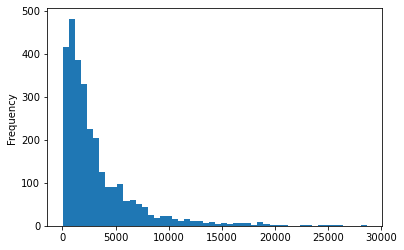

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
df['length'].plot(bins=50, kind='hist')

In [34]:
df.length.describe()

count     2893.000000
mean      3230.122019
std       3654.605695
min         17.000000
25%        954.000000
50%       2026.000000
75%       4039.000000
max      28649.000000
Name: length, dtype: float64

In [36]:
df[df['length'] == 28649]['message'].iloc[0]

'g . sampson , ( 1997 ) educating eve : the language instinct debate , cassell , london , 184pp . reviewed by feargal murphy , university college dublin . the rise of generative linguistics in 60s gave a new lease of life to the old nature vs . nurture debate . the behaviourist model of language was judged a failure at explaining the process of language acquisition and a new theory of language acquisition emerged . it was rooted in the philosophy of descartes in the 17th century as well as humboldt and , ultimately , plato . it came to be known as linguistic nativism or rationalist linguistics and is most associated with noam chomsky . the central tenet of this theory is that children are born with some kind of language acquisition device already in place in their brains which allows them to acquire the language of their environment . within linguistic nativism there has been some debate as to whether this device provides merely general rules that allow for the acquisition of language 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE0BF70250>,
      dtype=object)

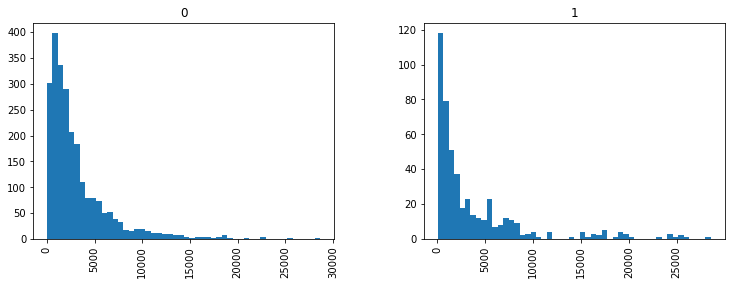

In [37]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

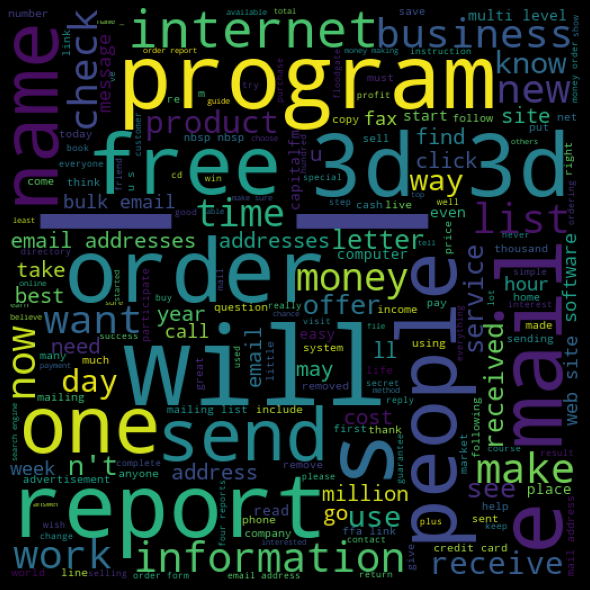

In [76]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
spam_words=''.join(list(df[df['label']==1]['message']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

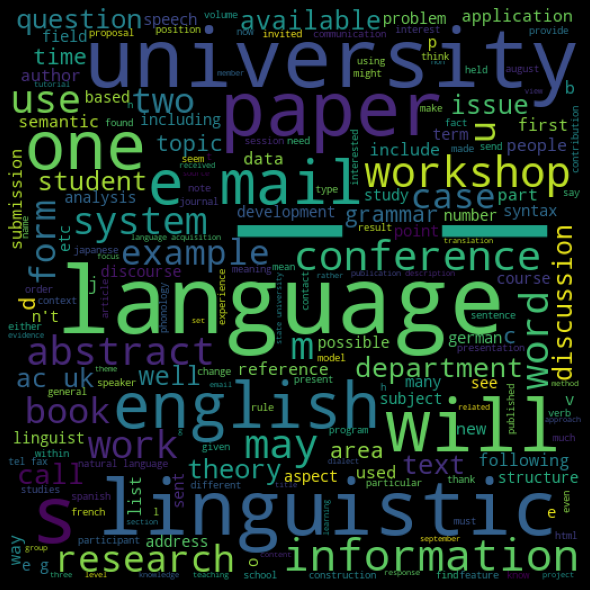

In [77]:
ham_words=''.join(list(df[df['label']==0]['message']))
ham_wc=WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Text Pre-processing

In [38]:

import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayakiran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [41]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [42]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [43]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [46]:
def text_process(mess):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                      
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324  
4  earlier this morning i was on the phone with a...      0    1046

In [50]:
# Check to make sure its working
df['message'].head(5).apply(text_process)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

#### Vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

64661


In [53]:
message4 = df['message'][3]
print(message4)

a colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have n't come up with much . can anyone help here ?



In [54]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 9170)	1
  (0, 9550)	1
  (0, 15963)	1
  (0, 16080)	1
  (0, 17011)	1
  (0, 18946)	1
  (0, 19823)	1
  (0, 19835)	1
  (0, 22436)	1
  (0, 24136)	1
  (0, 24732)	1
  (0, 28910)	1
  (0, 29660)	1
  (0, 31853)	1
  (0, 34653)	1
  (0, 35428)	1
  (0, 35778)	1
  (0, 40796)	1
  (0, 42843)	1
  (0, 45343)	1
  (0, 50013)	1
  (0, 50040)	1
  (0, 50047)	1
  (0, 50660)	1
  (0, 50665)	1
  (0, 54990)	1
  (0, 55885)	1
  (0, 63648)	1
(1, 64661)


In [55]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

4791
ares


In [57]:
messages_bow = bow_transformer.transform(df['message'])

In [58]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (2893, 64661)
Amount of Non-Zero occurences:  545316


In [69]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: ',round(sparsity))

sparsity:  0


In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 63648)	0.09906137400724713
  (0, 55885)	0.13827303721762738
  (0, 54990)	0.16749869696529832
  (0, 50665)	0.3585752053461137
  (0, 50660)	0.22691307786619508
  (0, 50047)	0.2769570318338709
  (0, 50040)	0.10283078013865428
  (0, 50013)	0.15728831073549404
  (0, 45343)	0.26385254671241254
  (0, 42843)	0.12608144777832525
  (0, 40796)	0.13380019699110607
  (0, 35778)	0.15877585417980128
  (0, 35428)	0.07879330197272683
  (0, 34653)	0.23624186679838444
  (0, 31853)	0.1302297826722719
  (0, 29660)	0.2313390780166541
  (0, 28910)	0.14336794762517718
  (0, 24732)	0.13720117670652762
  (0, 24136)	0.16418838108814185
  (0, 22436)	0.09998788669254909
  (0, 19835)	0.2795607101838915
  (0, 19823)	0.1258973991644821
  (0, 18946)	0.2372890846418792
  (0, 17011)	0.20023206225956566
  (0, 16080)	0.1484979593773378
  (0, 15963)	0.24538281228930384
  (0, 9550)	0.14296542391647932
  (0, 9170)	0.14269903736808642


In [61]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.0145575377265983
1.6794201290484474


In [62]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(2893, 64661)


#### Training a model

In [63]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['label'])

In [65]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.label[3])

predicted: 0
expected: 0


#### Model Evaluation

In [66]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[0 0 0 ... 0 0 0]


In [68]:
from sklearn.metrics import classification_report
print (classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2412
           1       1.00      0.48      0.65       481

    accuracy                           0.91      2893
   macro avg       0.95      0.74      0.80      2893
weighted avg       0.92      0.91      0.90      2893



#### Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(label_train) + len(label_test))

2314 579 2893


#### Creating a Data Pipeline

In [74]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [75]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001BE0C129430>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [78]:
predictions = pipeline.predict(msg_test)

In [79]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       553
           1       0.27      1.00      0.43        26

    accuracy                           0.88       579
   macro avg       0.64      0.94      0.68       579
weighted avg       0.97      0.88      0.91       579



In [17]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [18]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam =dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [20]:
import tkinter
from tkinter import messagebox
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

root = tkinter.Tk()
root.withdraw()

''

In [21]:
def alldonewithflyingcolors(pm,new):
    if sc_tf_idf.classify(pm)==True:
        #ctypes.windll.user32.MessageBoxW(0,'Alert')
        # print('AlertIt is a spam email')
        #tkMessageBox.showinfo('alert')
        messagebox.showwarning("Message Passed to Spam Filter Model",message=new)
        messagebox.showerror("Alert",message="Answer==Spam Email")
        #messagebox.ABORT()
    else:
        messagebox.showwarning("Message Passed to Spam Filter Model",message=new)
        messagebox.showinfo("Good News",message="Answer==Good Email")

In [29]:
sc_tf_idf=SpamClassifier(trainData,'tf-idf')
sc_tf_idf.train()
preds_tf_idf=sc_tf_idf.predict(testData['message'])
metrics(testData['label'],preds_tf_idf)

Precision:  0.9722222222222222
Recall:  0.84
F-score:  0.9012875536480687
Accuracy:  0.9682758620689655
